In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import pandas as pd

file_path = 'test.csv'
test_data = pd.read_csv(file_path, nrows=10000)
test_data.head() 
 

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [6]:
import pandas as pd

# Example of loading a DataFrame
df = pd.read_csv('test.csv')

# Now you can access the columns
print(df.columns)


Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City', 'Usage'],
      dtype='object')


In [2]:
import pandas as pd

# Load the DataFrame
df = pd.read_csv('test.csv')

# Drop the specified columns
df = df.drop(columns=['Id', 'Usage'])


In [6]:
import pandas as pd

# Load the test dataset
test = pd.read_csv('test.csv')  # Make sure to specify the correct path to your file

# Check for null values
nullvalues = test.isna().sum()

# Sort the null values in descending order
nullvalues = nullvalues.sort_values(ascending=False)

# Display the result
print(nullvalues)


ActionGranular        99959
ActionGrouped         99959
ResourceType          99923
ThreatFamily          99246
EmailClusterId        98990
AntispamDirection     98095
Roles                 97281
SuspicionLevel        84529
LastVerdict           76091
MitreTechniques       55424
FileName                  0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
ApplicationName           0
OAuthApplicationId        0
Unnamed: 0                0
FolderPath                0
ResourceIdName            0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
RegistryKey               0
DeviceName                0
NetworkMessageId          0
EntityType                0
OrgId                     0
IncidentId                0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
IncidentGrade       

In [7]:
import pandas as pd

# List of columns to drop based on their null values
columns_to_drop = [
    'ResourceType', 
    'ActionGrouped', 
    'ActionGranular', 
    'ThreatFamily', 
    'EmailClusterId', 
    'AntispamDirection', 
    'Roles', 
    'SuspicionLevel', 
    'LastVerdict', 
    'MitreTechniques'
]

# Drop the specified columns
df = df.drop(columns=columns_to_drop)

# Check the remaining columns
print("Remaining columns after dropping:")
print(df.columns)

Remaining columns after dropping:
Index(['Unnamed: 0', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'RegistryKey', 'RegistryValueName',
       'RegistryValueData', 'ApplicationId', 'ApplicationName',
       'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName',
       'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City'],
      dtype='object')


In [8]:
df = df.dropna()

In [9]:
import pandas as pd

# Create a DataFrame
df['Timestamp'] = pd.DataFrame(df['Timestamp'])

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Separate year, month, and day into new columns
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day

# Display the DataFrame
df = df.drop(columns=['Timestamp'])

In [10]:
df

,Unnamed: 0,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
0,0,657,11767,87199,524,563,LateralMovement,BenignPositive,User,Impacted,...,117668,3586,5,66,242,1445,10630,2024,6,4
1,1,3,91158,632273,2,2,CommandAndControl,BenignPositive,Machine,Impacted,...,117668,3586,0,0,242,1445,10630,2024,6,3
2,2,145,32247,131719,2932,10807,LateralMovement,BenignPositive,Process,Related,...,22,3586,5,66,242,1445,10630,2024,6,8
3,3,222,15294,917686,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,...,117668,3586,5,66,242,1445,10630,2024,6,12
4,4,363,7615,5944,27,18,Discovery,BenignPositive,User,Impacted,...,117668,3586,5,66,242,1445,10630,2024,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,311,8818,130231,2,2,CommandAndControl,BenignPositive,Url,Related,...,117668,3586,5,66,242,1445,10630,2024,6,4
99996,99996,162,79959,40012,1,1,InitialAccess,TruePositive,Url,Related,...,117668,3586,5,66,242,1445,10630,2024,6,16
99997,99997,67,43034,22502,1,1,InitialAccess,BenignPositive,MailMessage,Related,...,117668,3586,5,66,242,1445,10630,2024,6,9
99998,99998,11,409369,1007169,0,0,InitialAccess,FalsePositive,Ip,Related,...,117668,3586,5,66,2,15,13,2024,6,6


In [11]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Assuming your dataframe is called 'df' and the column is 'incidentgrade'

# Get the value counts
value_counts = df['IncidentGrade'].value_counts()

# Find the minimum count
min_count = value_counts.min()

# Create a list to store the balanced dataframes
balanced_dfs = []

# Undersample each class
for class_value in value_counts.index:
    class_df = df[df['IncidentGrade'] == class_value]
    if len(class_df) > min_count:
        # Undersample
        undersampled_df = resample(class_df,
                                   replace=False,    # sample without replacement
                                   n_samples=min_count,
                                   random_state=42)  # reproducible results
        balanced_dfs.append(undersampled_df)
    else:
        # If this class is already at or below the minimum, keep all samples
        balanced_dfs.append(class_df)

# Combine the balanced dataframes
df_balanced = pd.concat(balanced_dfs)

# Verify the new class distribution
print(df_balanced['IncidentGrade'].value_counts())
df = df_balanced

IncidentGrade
BenignPositive    21612
TruePositive      21612
FalsePositive     21612
Name: count, dtype: int64


In [12]:
df.shape

(64836, 37)

In [13]:
df = df.astype('category')

In [14]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.columns
# Convert all categorical columns to strings to ensure uniform type
for col in categorical_columns:
    df[col] = df[col].astype(str)

# Now apply LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

df.head()  # Check if categorical columns have been encoded


,Unnamed: 0,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,...,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Day
12498,1794,870,29627,38625,472,859,7,0,12,0,...,171,22,3,11,31,54,26,1,6,26
3848,20608,1815,4660,9992,1376,5713,7,0,10,0,...,171,22,3,11,31,54,26,1,6,22
85198,54136,753,2825,3602,81,6839,7,0,12,0,...,171,22,3,11,31,54,26,1,6,28
70416,43452,1499,10992,31433,1416,4882,10,0,13,0,...,171,22,3,11,31,54,26,1,6,4
27974,12984,1565,11450,24030,445,319,2,0,22,0,...,171,22,3,11,31,54,26,1,6,1


In [15]:
df.nunique()

Unnamed: 0            64836
OrgId                  2216
IncidentId            30258
AlertId               50889
DetectorId             1824
AlertTitle             7181
Category                 18
IncidentGrade             3
EntityType               23
EvidenceRole              2
DeviceId               1868
Sha256                 2474
IpAddress              9761
Url                    2893
AccountSid            11964
AccountUpn            17818
AccountObjectId       11719
AccountName           12439
DeviceName             3573
NetworkMessageId       6638
RegistryKey              53
RegistryValueName        24
RegistryValueData        35
ApplicationId            43
ApplicationName          75
OAuthApplicationId       19
FileName               3682
FolderPath             1938
ResourceIdName           37
OSFamily                  4
OSVersion                13
CountryCode             104
State                   330
City                    726
Year                      2
Month               

In [17]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Import the necessary function
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_column' is the name of the target variable
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-Validation split (80-20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print the shapes of the training and validation sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")


Training set shape: (51868, 36)
Validation set shape: (12968, 36)


In [24]:
# Import necessary metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

# Print the evaluation metrics
print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      4322
           1       0.91      0.85      0.88      4323
           2       0.92      0.86      0.89      4323

    accuracy                           0.88     12968
   macro avg       0.88      0.88      0.88     12968
weighted avg       0.88      0.88      0.88     12968

Macro F1 Score: 0.8795196167846938
Precision: 0.8835320852061153
Recall: 0.879090383507691


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = gb_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



              precision    recall  f1-score   support

           0       0.69      0.84      0.76      4322
           1       0.80      0.71      0.75      4323
           2       0.87      0.78      0.82      4323

    accuracy                           0.78     12968
   macro avg       0.79      0.78      0.78     12968
weighted avg       0.79      0.78      0.78     12968

Macro F1 Score: 0.777455427673722
Precision: 0.7865754258363514
Recall: 0.776609077660683


In [27]:
pip install XGBClassifier

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement XGBClassifier (from versions: none)
ERROR: No matching distribution found for XGBClassifier


In [30]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
    --------------------------------------- 2.1/124.9 MB 7.3 MB/s eta 0:00:17
   - -------------------------------------- 4.7/124.9 MB 9.8 MB/s eta 0:00:13
   -- ------------------------------------- 7.1/124.9 MB 10.2 MB/s eta 0:00:12
   --- ------------------------------------ 9.7/124.9 MB 10.8 MB/s eta 0:00:11
   --- ------------------------------------ 12.1/124.9 MB 10.9 MB/s eta 0:00:11
   ---- ----------------------------------- 14.7/124.9 MB 11.1 MB/s eta 0:00:10
   ----- ---------------------------------- 17.3/124.9 MB 11.1 MB/s eta 0:00:10
   ------ --------------------------------- 19.9/124.9 MB 11.2 MB/s eta 0:00:10
   ------- -------------------------------- 22.5/124.9 MB 11.3 MB/s eta 0:00:10
   ------- -------------------------------- 24.9/124.9 MB 11.4 MB/s eta 0:00:09
   -------- ------------------------------- 27.5/124.9 MB 11.4 

In [31]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = xgb_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")




              precision    recall  f1-score   support

           0       0.85      0.90      0.87      4322
           1       0.89      0.87      0.88      4323
           2       0.91      0.88      0.90      4323

    accuracy                           0.88     12968
   macro avg       0.88      0.88      0.88     12968
weighted avg       0.88      0.88      0.88     12968

Macro F1 Score: 0.8829227480985867
Precision: 0.8839478115855574
Recall: 0.8827123583668298


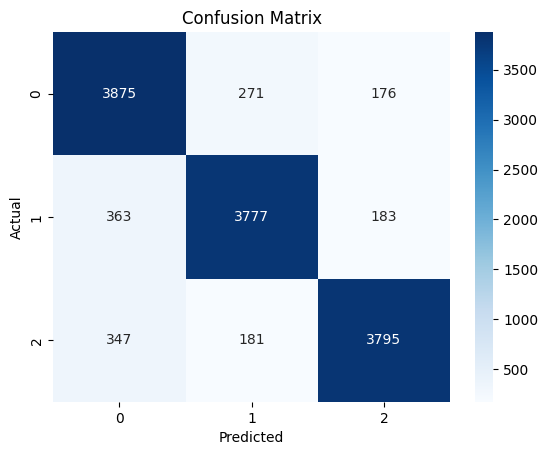

In [33]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix to visualize misclassifications
conf_matrix = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(best_model)

# Make predictbesions on validation set
y_pred = best_model.predict(X_val)

# Evaluate model performance
print(classification_report(y_val, y_pred))

# Check macro F1, precision, and recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

print(f"Macro F1 Score: {macro_f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")



RandomForestClassifier(max_depth=15, n_estimators=150, random_state=42)
              precision    recall  f1-score   support

           0       0.69      0.94      0.79      4322
           1       0.91      0.75      0.82      4323
           2       0.93      0.75      0.83      4323

    accuracy                           0.81     12968
   macro avg       0.84      0.81      0.82     12968
weighted avg       0.84      0.81      0.82     12968

Macro F1 Score: 0.8154826039078323
Precision: 0.8412154506196957
Recall: 0.8135506022280946
